<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Course 4, Part a: K-Means Clustering LAB


Estimated time needed: **30** minutes


__Purpose:__
The purpose of this lab exercise is to learn how to use an unsupervised learning algorithm, **K-means** using sklearn.   

__At the end of this lab you will be able to:__
> 1. Run a K-means algorithm.
> 2. Understand what parameters are customizable for the algorithm.
> 3. Know how to use the inertia curve to determine the optimal number of clusters.


### K-Means Overview

**K-means** is one of the most basic clustering algorithms.  It relies on finding cluster centers to group data points based on minimizing the sum of squared errors between each datapoint and its cluster center.  


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

%config InlineBackend.figure_formats = ['retina']

In [25]:
import warnings


warnings.filterwarnings('ignore')

In [26]:
plt.rcParams['figure.figsize'] = [6, 6]
sns.set_style('whitegrid')
sns.set_context('talk')

In [27]:
RANDOM_STATE = 123

K-means clustering is one of the most simple clustering algorithms.  One of the limitations is that it depends on the starting point of the clusters, and the number of clusters need to be defined beforehand.


### Cluster starting points
Let's start by creating a simple dataset.


In [28]:
def display_cluster(X, km=[], num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    
    if num_clusters == 0:
        plt.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_ == i, 0], X[km.labels_ == i, 1], c=color[i], alpha=alpha, s=s)
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c=color[i], marker='x', s=100)

def fit_and_display_k_means(num_clusters, X, random_state=RANDOM_STATE, n_init=1):
    km = KMeans(n_clusters=num_clusters,
                random_state=random_state,
                n_init=n_init)
    km.fit(X)
    print(f"inertia: {km.inertia_}")
    display_cluster(X, km, num_clusters)

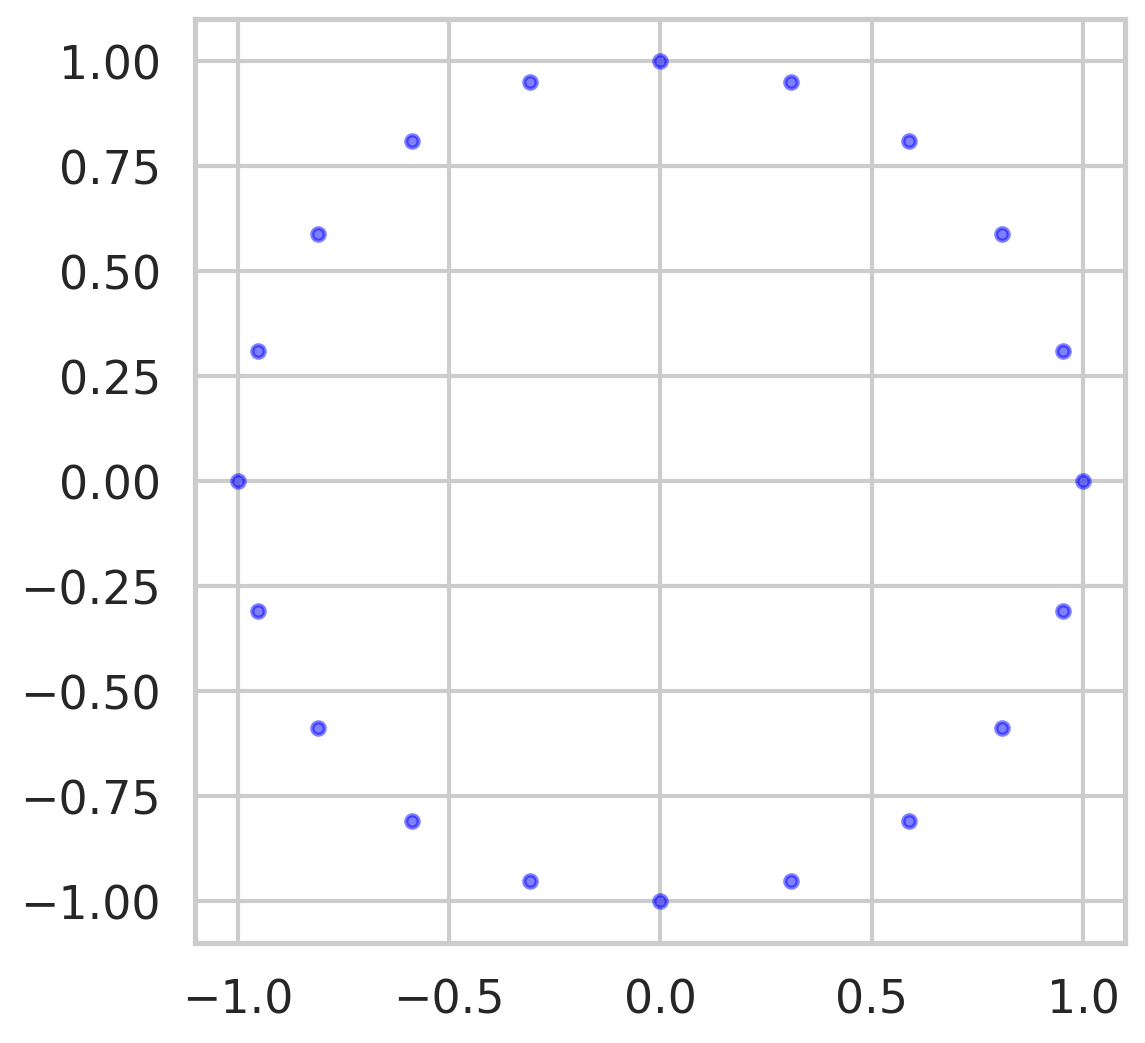

In [29]:
angle = np.linspace(0, 2 * np.pi, 20, endpoint=False)
X = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()
display_cluster(X)

Let's now group this data into two clusters.  We will use two different random states to initialize the algorithm. Settign a the __[random state](https://numpy.org/doc/stable/reference/random/legacy.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#numpy.random.RandomState)__ variable is useful for testing and allows us to seed the randomness (so we get the same results each time).


inertia: 11.827308362187718


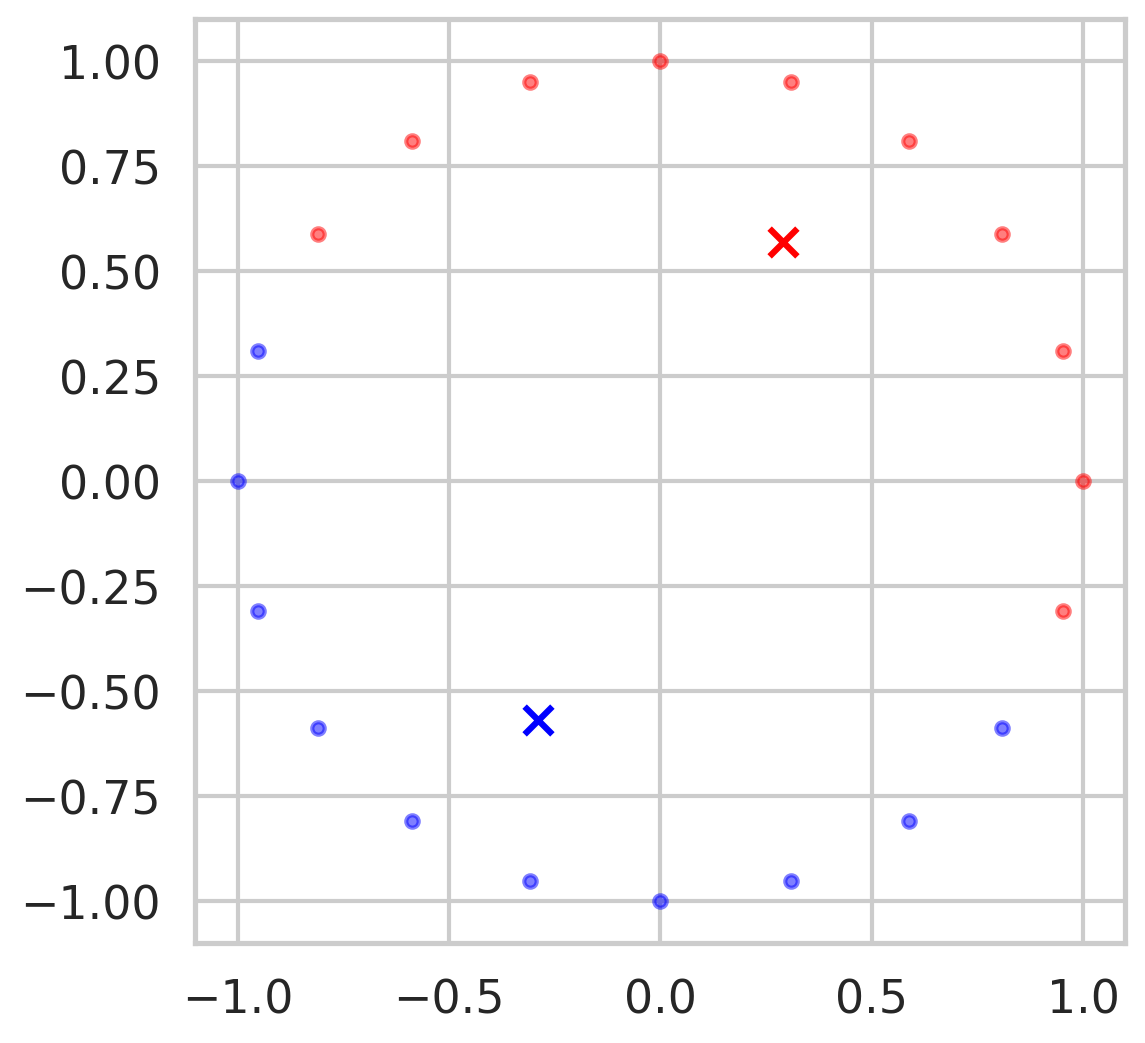

In [30]:
num_clusters = 2
fit_and_display_k_means(num_clusters, X)

Clustering with a random state of 20:


inertia: 11.827308362187718


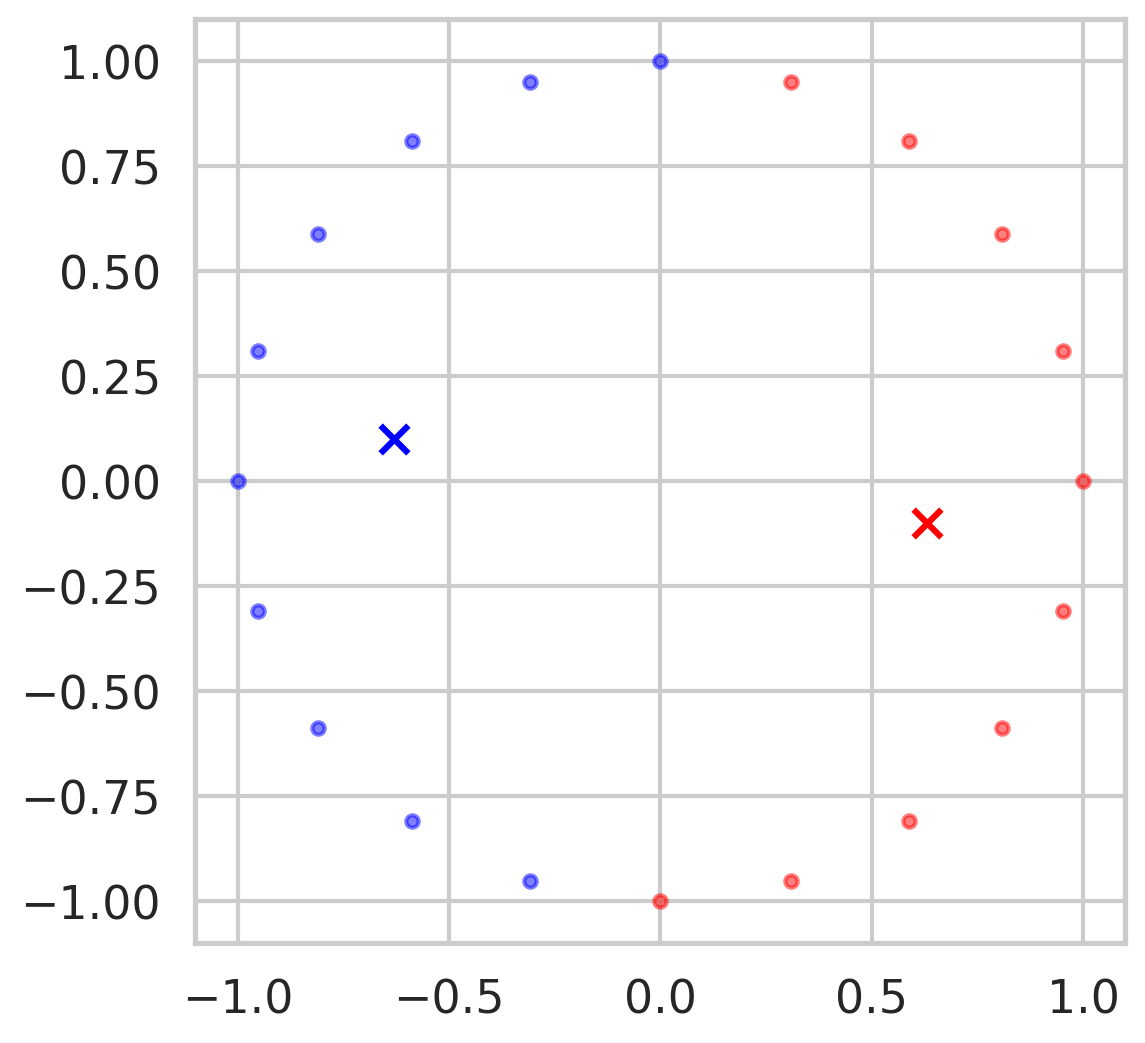

In [31]:
fit_and_display_k_means(num_clusters, X, random_state=20)

### Determining optimium number of clusters

Let's create a new dataset that visually consists on a few clusters and try to group them.


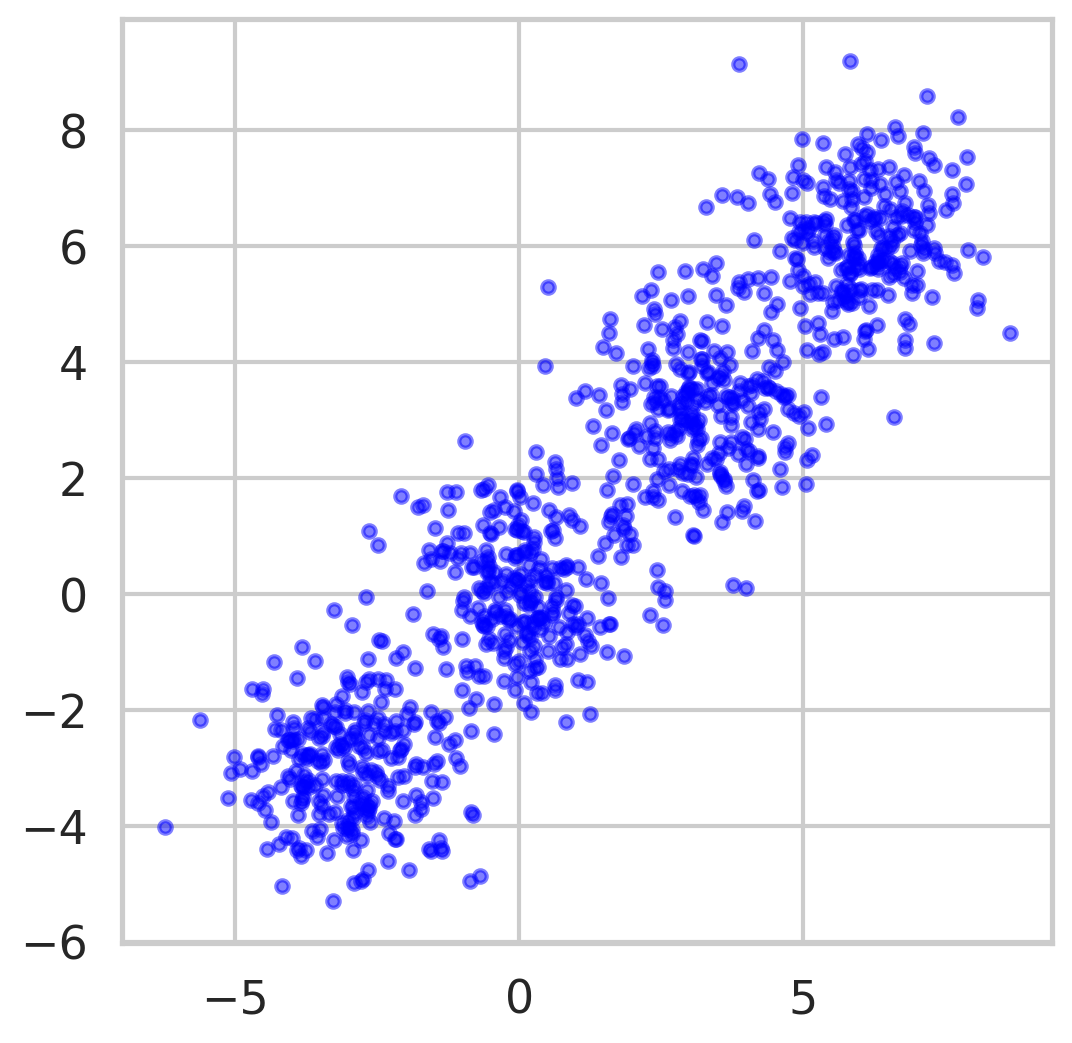

In [32]:
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_samples,
                  n_features=2,
                  cluster_std=1.0,
                  centers=centers,
                  shuffle=False,
                  random_state=42)
display_cluster(X)

Let's run K-means with seven clusters.

In [33]:
num_clusters = 7

inertia: 1347.583290404646


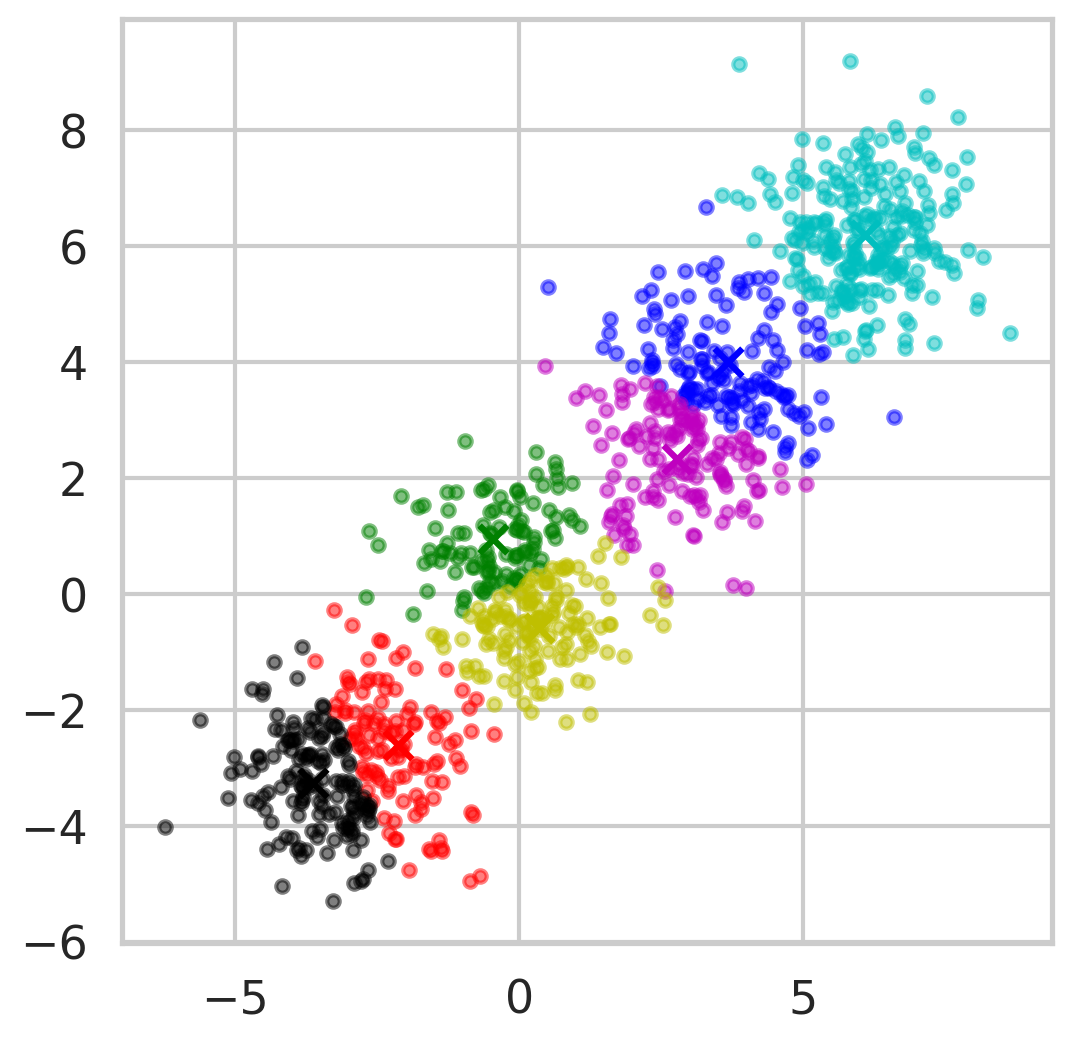

In [34]:
fit_and_display_k_means(num_clusters, X)

In [35]:
num_clusters = 4

inertia: 1880.22593360267


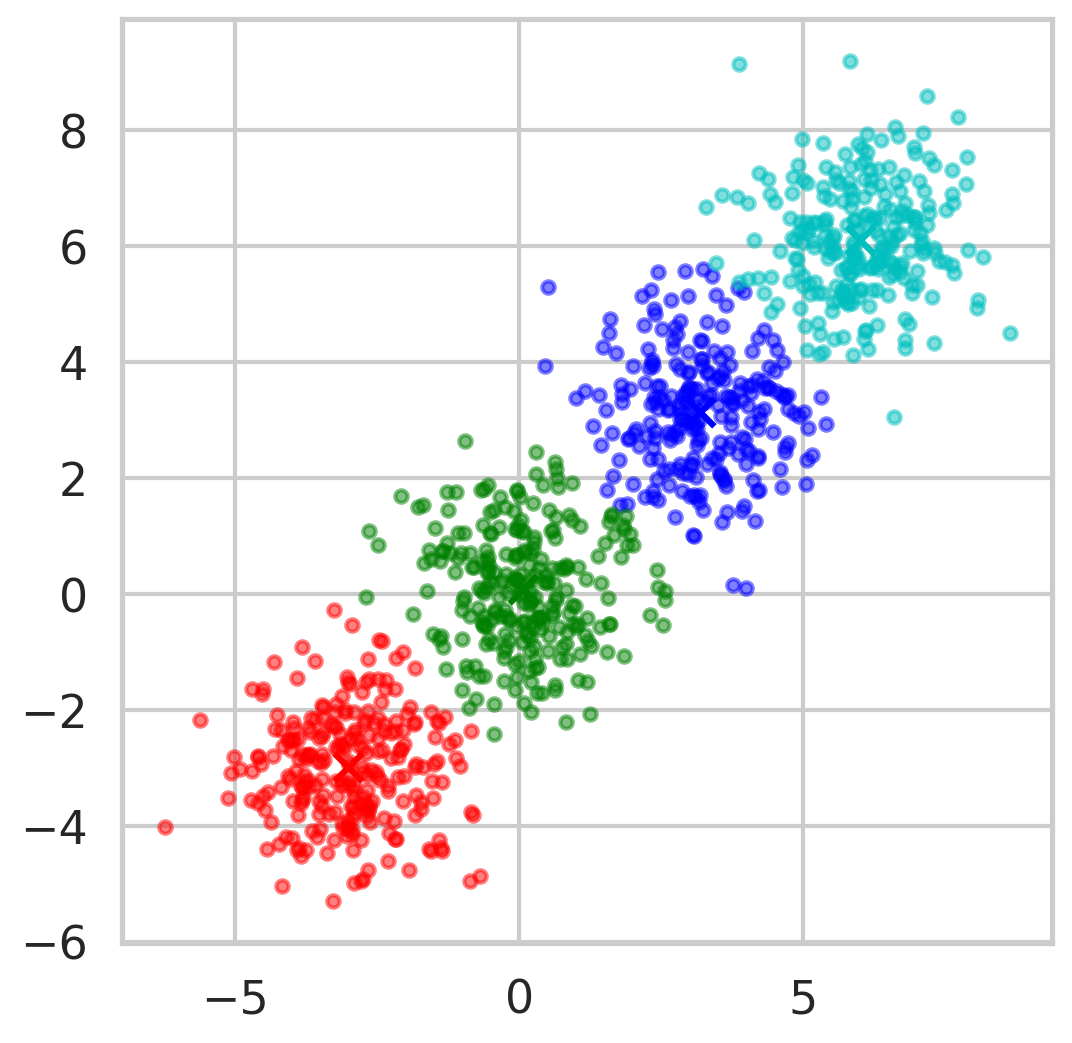

In [36]:
fit_and_display_k_means(num_clusters, X)

### Problem 1:

Write code that calculates the inertia for 1 to 10 clusters, and plot the inertia as a function of the number of clusters.


Text(0, 0.5, 'Inertia')

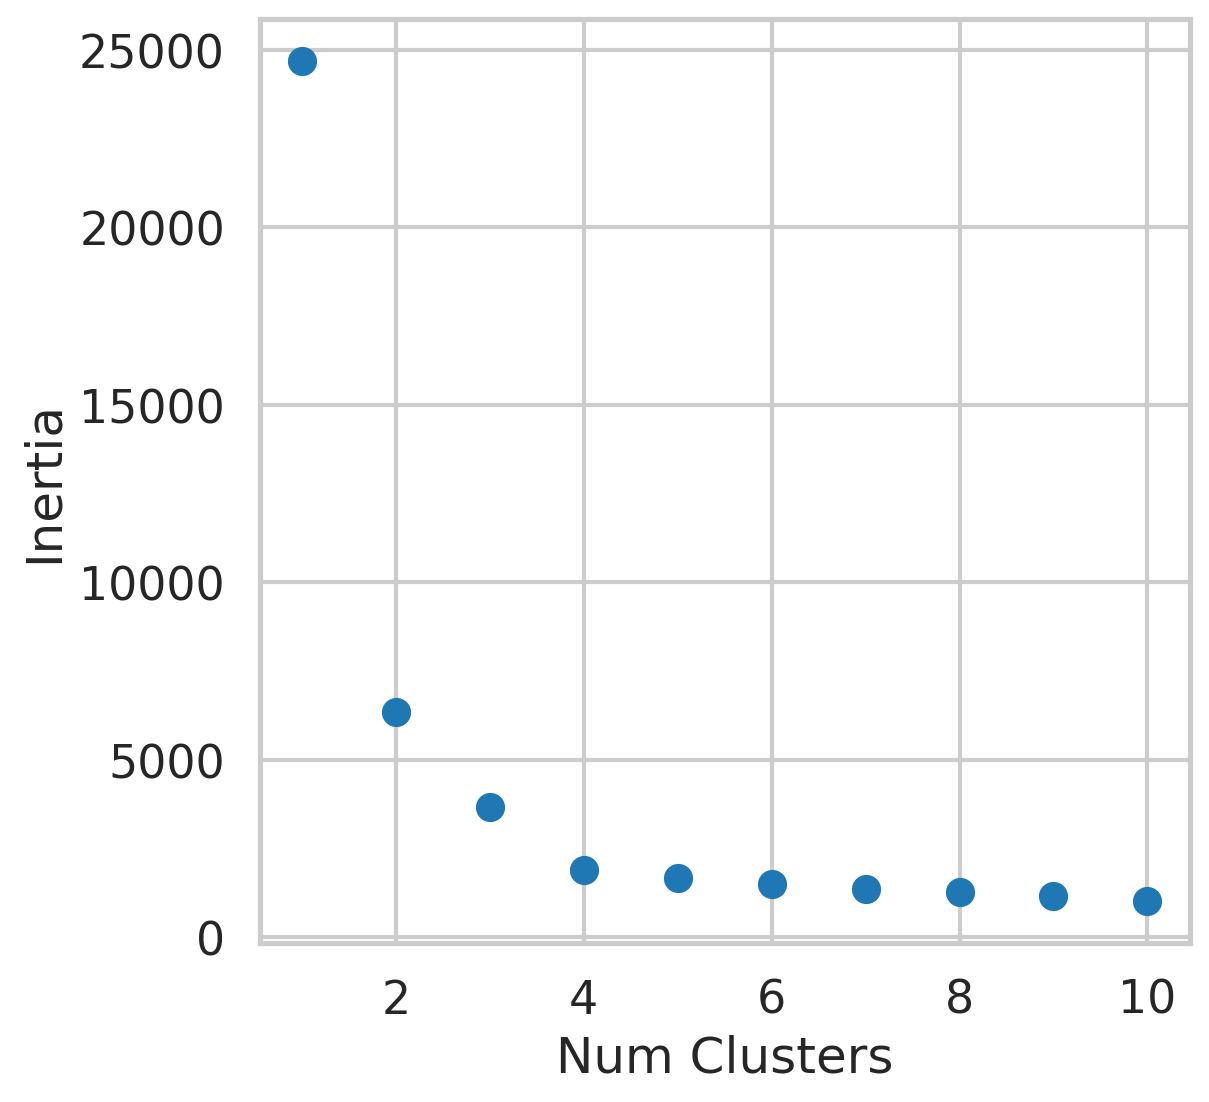

In [38]:
inertia = []
list_num_clusters = list(range(1, 11))

for num_clusters in list(range(1, 11)):
    km = KMeans(n_clusters=num_clusters,
                random_state=RANDOM_STATE)
    km.fit(X)
    inertia.append(km.inertia_)

plt.scatter(list_num_clusters, inertia)
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')

### Clustering Colors from an Image

The next few exercises use an image of bell peppers. Let's start by loading it:


In [42]:
image_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/peppers.jpg'

(-0.5, 639.5, 479.5, -0.5)

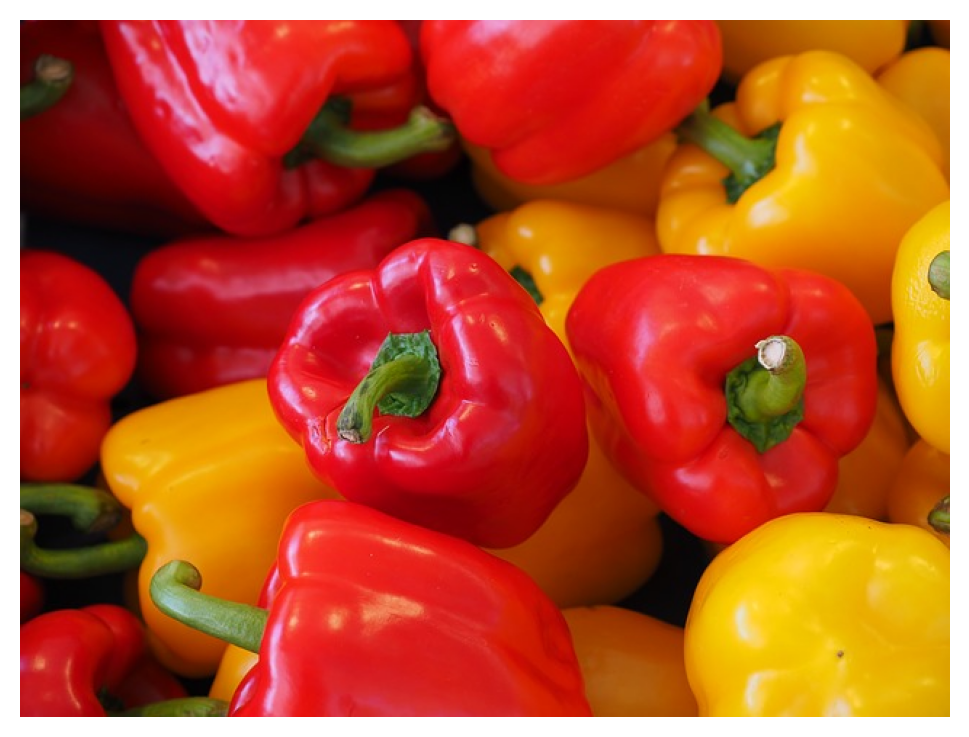

In [46]:
from PIL import Image
import urllib.request

with urllib.request.urlopen(image_url) as url:
    with open ('peppers.jpg', 'wb') as f:
        f.write(url.read())

img = plt.imread('peppers.jpg')
plt.imshow(img)
plt.axis('off')

In [47]:
img.shape

(480, 640, 3)

The image above has 480 pixels in height and 640 pixels in width.  Each pixel has 3 values that represent how much red, green and blue it has. Below you can play with different combinations of RGB to create different colors. In total, you can create $256^3 = 16,777,216$ unique colors.


In [48]:
R = 35
G = 95
B = 131

(-0.5, 0.5, 0.5, -0.5)

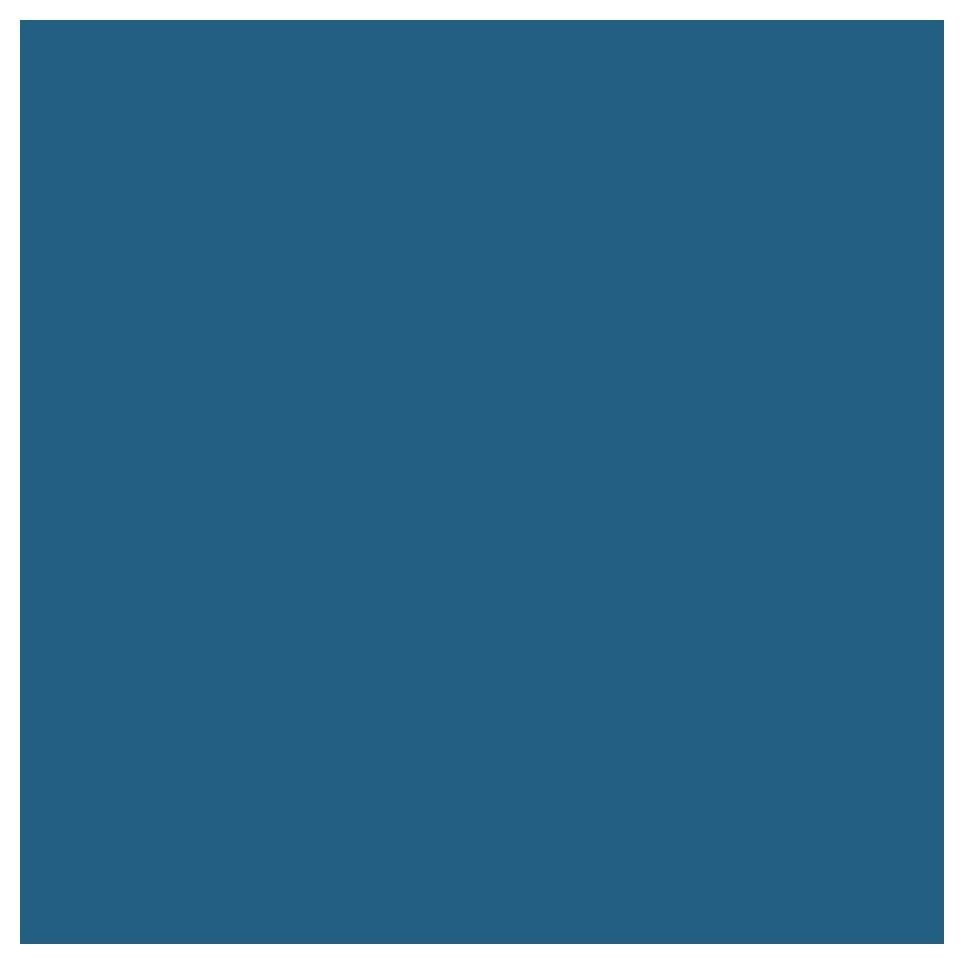

In [49]:
plt.imshow([[np.array([R, G, B]).astype('uint8')]])
plt.axis('off')

First we will reshape the image into a table that has a pixel per row and each column represents the red, green and blue channel.


In [50]:
img_flat = img.reshape(-1, 3)
img_flat[:5, :]

array([[21, 16, 23],
       [28, 15, 22],
       [45, 14, 22],
       [65, 16, 22],
       [84, 14, 24]], dtype=uint8)

In [51]:
img_flat.shape

(307200, 3)

In [53]:
kmeans = KMeans(
    n_clusters=8,
    random_state=RANDOM_STATE
)
kmeans.fit(img_flat)

293951351.86923623

In [54]:
kmeans.inertia_

293951351.86923623

In [55]:
kmeans.labels_

array([6, 6, 6, ..., 2, 2, 2], dtype=int32)

In [56]:
img_flat2 = img_flat.copy()

for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_ == i, :] = kmeans.cluster_centers_[i]

(-0.5, 639.5, 479.5, -0.5)

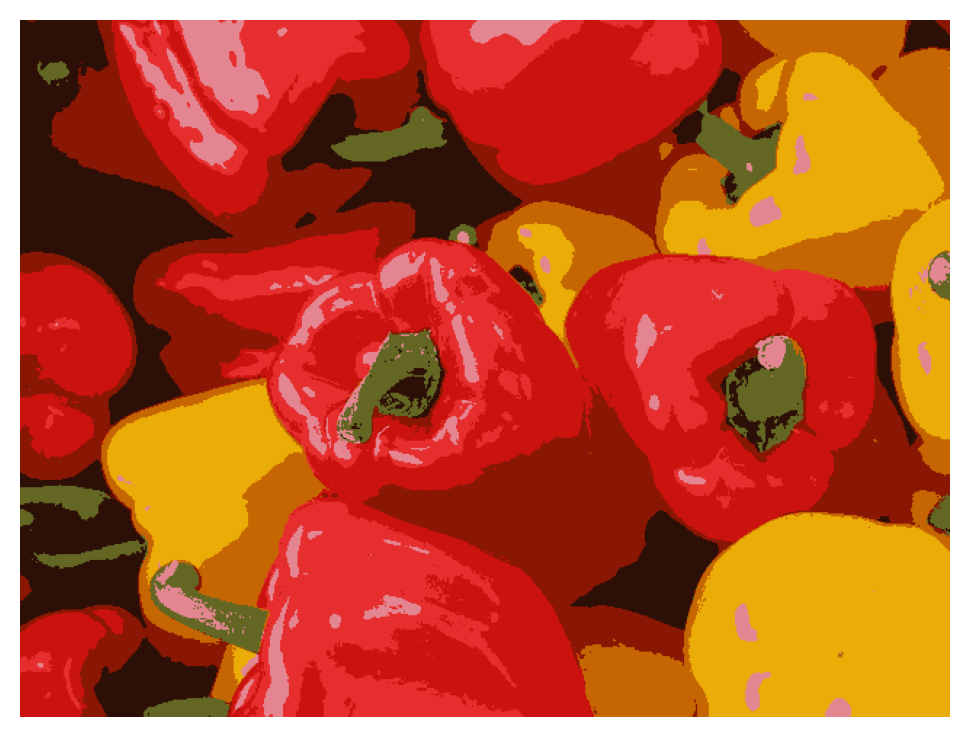

In [57]:
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off')

### Problem 2:
Write a function that receives the image and number of clusters (k), and returns (1) the image quantized into k colors, and (2) the inertia.


In [59]:
def image_cluster(img, k, random_state=RANDOM_STATE):
    img_flat = img.reshape(img.shape[0] * img.shape[1], 3)
    kmeans = KMeans(n_clusters=k,
                    random_state=RANDOM_STATE)
    kmeans.fit(img_flat)
    img_flat2 = img_flat.copy()
    
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_ == i, :] = kmeans.cluster_centers_[i]
    
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_

### Problem 3:

Call the function for k between 2 and 20, and draw an inertia curve. What is the optimum number of clusters?


In [69]:
k_vals = list(range(2, 21, 2))
img_list = []
intertias = []

for k in k_vals:
    img2, ine = image_cluster(img, k)
    img_list.append(img2)
    intertias.append(ine)

In [70]:
len(intertias)

10

In [71]:
len(img_list)

10

Text(0, 0.5, 'Inertia')

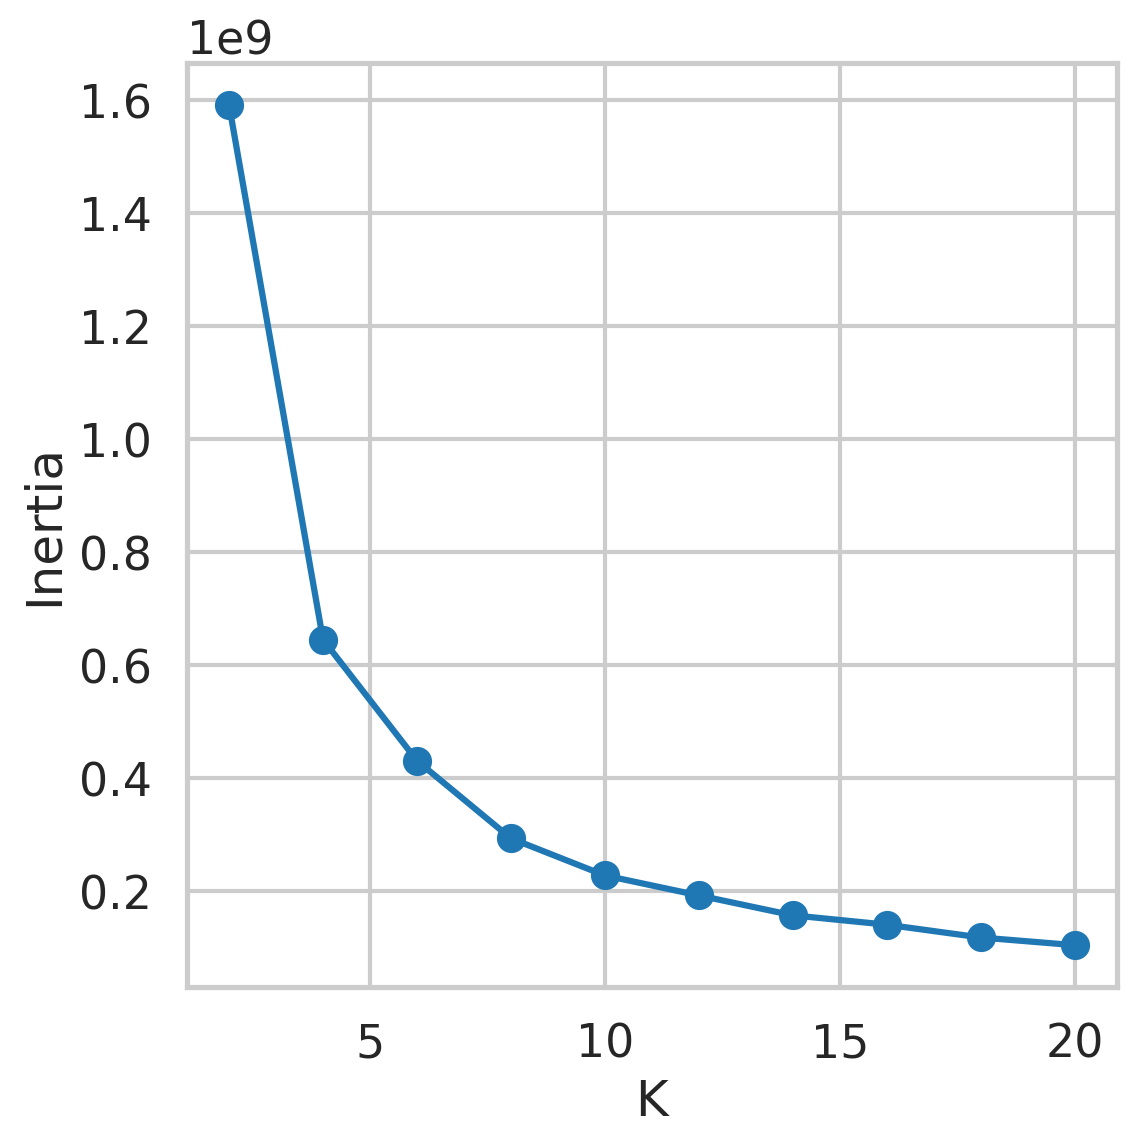

In [73]:
plt.plot(k_vals, intertias)
plt.scatter(k_vals, intertias)
plt.xlabel('K')
plt.ylabel('Inertia')

Sometimes, the elbow method does not yield a clear decision (for example, if the elbow is not clear and sharp, or is ambiguous).  In such cases, alternatives such as the [silhouette coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) can be helpful.


### Problem 4:
Plot in a grid all the images for the different k values.


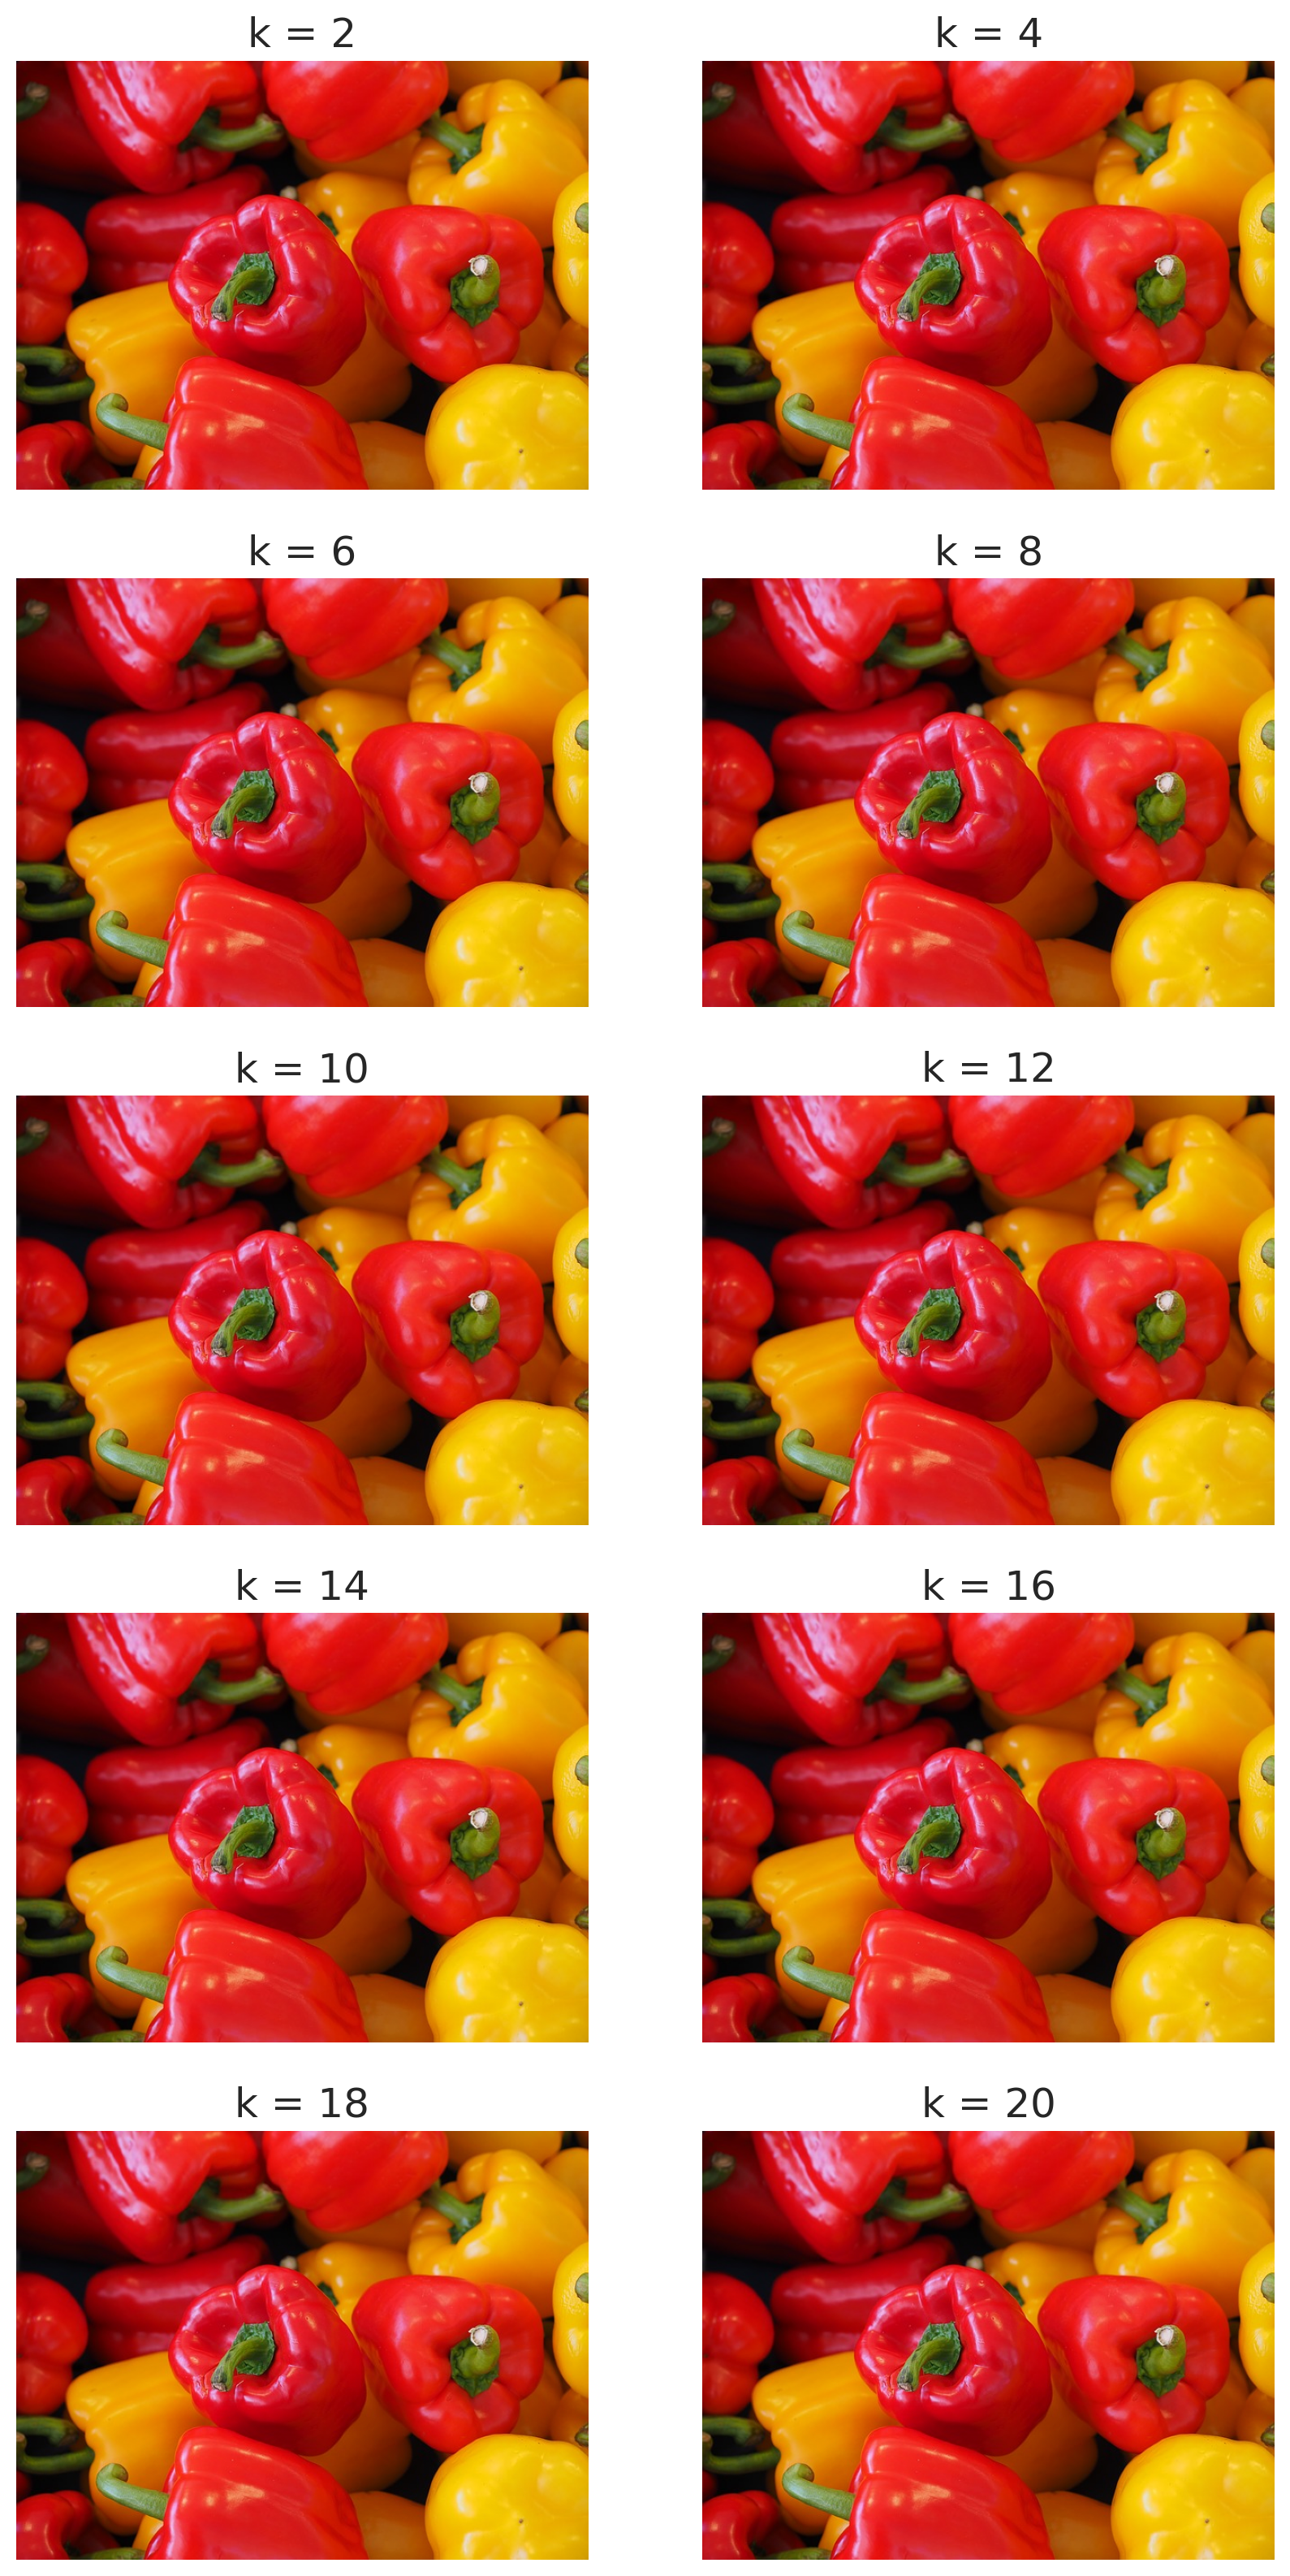

In [76]:
plt.figure(figsize=[10, 20])
for i in range(len(k_vals)):
    plt.subplot(5, 2, i + 1)
    plt.imshow(img_list[i])
    plt.title(f"k = {k_vals[i]}")
    plt.axis('off')